In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import numpy as np

In [2]:
df=pd.read_csv("DATA_FINAL_withSKILLS_URL.csv")

In [39]:
df.columns

Index(['Unnamed: 0', 'url', 'location', 'connectionsCount', 'nobre de projets',
       'Turnover', 'YoungGraduate', 'Gender', 'score', 'profil', 'BTP', 'BTS',
       'Baccalauréat', 'Docteur', 'Ingénieur', 'Licence', 'Master', 'Other',
       'Unnamed: 0_y', 'JavaScript', 'SQL', 'NoSQL', 'Node.js', 'Express.js',
       'Koa.js', 'Hapi.js', 'AngularJS', 'React.js', 'JQuery', 'Bash', 'Nginx',
       'C', 'C++', 'HTML5', 'CSS', 'REST', 'SASS', 'PostCss', 'Webpack',
       'Gitlab', 'Linux', 'Embedded C', 'Embedded C++', 'Java', 'JEE',
       'Microservices', 'Intégration continue', 'Docker', 'AWS', 'NodeJS',
       'Ext.js', 'HTML', 'MongoDB', 'MySQL', 'Spring', 'SOA', 'SOAP', 'Git',
       'SVN', 'Jira', 'Confluence', 'Spring Boot', 'Spring Security', 'Java 8',
       'PHP', 'Symfony', 'Architecture RESTful', 'GIT', 'CMS', 'Drupal',
       'Scrum', 'Analyse fonctionnelle', 'Testing', 'Rédaction'],
      dtype='object')

In [40]:
df=df.drop(columns=["Unnamed: 0"])

In [41]:
df

,url,location,connectionsCount,nobre de projets,Turnover,YoungGraduate,Gender,score,profil,BTP,...,PHP,Symfony,Architecture RESTful,GIT,CMS,Drupal,Scrum,Analyse fonctionnelle,Testing,Rédaction
0,in/nourheneghannouchi/,1,1,1,0,0,1,12,Technical Lead/ Architecte JEE,0.0,...,0,0,0,0,0,0,0,0,0,0
1,in/aminesagaama/,0,1,0,0,0,1,51,JAVA/JEE,0.0,...,0,0,0,0,0,0,0,0,0,0
2,in/seifeddine-ferjani-2783b525/,0,0,0,0,0,1,0,Other,0.0,...,0,0,0,0,0,0,0,0,0,0
3,in/mednini-latifa-3b4438155/,1,0,0,0,0,1,0,Other,0.0,...,0,0,0,0,0,0,0,0,0,0
4,in/houssem-eddine-safar-88a708ab/,1,1,3,0,0,1,6,DRUPAL,0.0,...,2,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9620,in/friji-oussama/,1,1,4,0,0,1,0,Other,0.0,...,0,0,0,0,0,0,0,0,0,0
9621,in/mohamed-lassaad-medimagh-b873791b/,0,0,0,0,0,1,294,JAVA/JEE,0.0,...,0,0,0,0,0,0,14,0,9,75
9622,in/zakaria-lhajjam-267043107/,0,1,3,0,0,1,117,Technical Lead/ Architecte JEE,0.0,...,0,0,0,0,0,0,0,0,0,0
9623,in/habib-bouhadida-b5403474/,0,1,2,0,0,1,45,Web Front-End,0.0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
weights={'Web Back-End':{'JavaScript':1,'SQL':3,'NoSQL':2,'Node.js':3,'Express.js':3,'Koa.js':1,'Hapi.js':1,'AngularJS':1,
                         'React.js': 1 ,'JQuery':1,'Bash':1,'Nginx':1,'C':1,'C++':1},
         'Web Front-End':{'JavaScript':3,'HTML5':3,'CSS':3,'REST':3,'React.js':3,'SASS':1,'PostCss':1,'Webpack':1,'Gitlab':1},
         'Embarqué Middleware':{'C':2,'C++':2,'Linux':3,'Embedded C':3,'Embedded C++':3},
         'Technical Lead/ Architecte JEE':{'Java':3,'JEE':3,'Microservices':3,'Intégration continue':3,'Docker':3,'AWS':3},
         'FullStack JS':{'NodeJS':3,'JavaScript':3,'AngularJS':3,'Ext.js':3,'JQuery':2,'HTML':2,'CSS':2,'MongoDB':2,'MySQL':2},
         'JAVA/JEE':{ 'Java':3,'JEE':3,'Spring':3,'SOA':1,'SOAP':1,'REST':1,'Microservices':3,'Git':3,'SVN':2,'Jira':1,'Confluence':1,'Spring Boot':3, 'Spring Security':3,'Java 8': 3},
         'PHP/Symfony':{'PHP':3,'Symfony':3,'Architecture RESTful':2,'GIT':2},
         'DRUPAL':{'PHP':3,'CMS':1,'Drupal':3 ,'HTML':1 ,'CSS':1 ,'MySQL':1 ,'Symfony':2 ,'JavaScript':2, 'GIT':2},
         'Product Owner':{'Scrum':3,'Analyse fonctionnelle':3,'Testing':3 ,'Rédaction':3}}

In [43]:

df["profil"]=""
df["score"]=0

In [47]:
def cal(profil,index):
    score=0
    skills=weights.get(profil)
    for skill in skills:
        score=score+skills[skill]*df[skill][index]
    return score
    

In [48]:
for i in range(0,len(df)):
    dict={}
    for key in weights.keys():
        score=cal(key,i)
        dict[key]=score
    res=sorted(dict.items(), key=lambda x: x[1], reverse=True)
    if (i==5000):
        print(res)
    if res[0][1]!=0:
        df["profil"][i]=res[1][0]
        df["score"][i]=res[0][1]
    else:
        df["profil"][i]="Other"
    
        
    

C:\Users\Wathek\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Wathek\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Wathek\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

[('JAVA/JEE', 64), ('Web Back-End', 0), ('Web Front-End', 0), ('Embarqué Middleware', 0), ('Technical Lead/ Architecte JEE', 0), ('FullStack JS', 0), ('PHP/Symfony', 0), ('DRUPAL', 0), ('Product Owner', 0)]


In [49]:
df


,url,location,connectionsCount,nobre de projets,Turnover,YoungGraduate,Gender,score,profil,BTP,...,PHP,Symfony,Architecture RESTful,GIT,CMS,Drupal,Scrum,Analyse fonctionnelle,Testing,Rédaction
0,in/nourheneghannouchi/,1,1,1,0,0,1,12,Technical Lead/ Architecte JEE,0.0,...,0,0,0,0,0,0,0,0,0,0
1,in/aminesagaama/,0,1,0,0,0,1,51,JAVA/JEE,0.0,...,0,0,0,0,0,0,0,0,0,0
2,in/seifeddine-ferjani-2783b525/,0,0,0,0,0,1,6,Other,0.0,...,0,0,0,0,0,0,0,0,0,0
3,in/mednini-latifa-3b4438155/,1,0,0,0,0,1,270,Other,0.0,...,0,0,0,0,0,0,0,0,0,0
4,in/houssem-eddine-safar-88a708ab/,1,1,3,0,0,1,6,DRUPAL,0.0,...,2,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9620,in/friji-oussama/,1,1,4,0,0,1,0,Other,0.0,...,0,0,0,0,0,0,0,0,0,0
9621,in/mohamed-lassaad-medimagh-b873791b/,0,0,0,0,0,1,294,JAVA/JEE,0.0,...,0,0,0,0,0,0,14,0,9,75
9622,in/zakaria-lhajjam-267043107/,0,1,3,0,0,1,117,Technical Lead/ Architecte JEE,0.0,...,0,0,0,0,0,0,0,0,0,0
9623,in/habib-bouhadida-b5403474/,0,1,2,0,0,1,45,Web Front-End,0.0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data =df[df["score"]!=0]

In [6]:
data.to_csv("filtered_data.csv")

In [86]:
data=pd.read_csv("filtered_data.csv")
data

,Unnamed: 0,Unnamed: 0.1,url,location,connectionsCount,nobre de projets,Turnover,YoungGraduate,Gender,score,...,PHP,Symfony,Architecture RESTful,GIT,CMS,Drupal,Scrum,Analyse fonctionnelle,Testing,Rédaction
0,0,0,in/nourheneghannouchi/,1,1,1,0,0,1,12,...,0,0,0,0,0,0,0,0,0,0
1,1,1,in/aminesagaama/,0,1,0,0,0,1,51,...,0,0,0,0,0,0,0,0,0,0
2,4,4,in/houssem-eddine-safar-88a708ab/,1,1,3,0,0,1,6,...,2,0,0,0,0,0,0,0,0,0
3,5,5,in/foued-jbali-7224a430/,0,1,0,0,0,1,270,...,3,58,0,3,0,0,23,0,67,0
4,7,7,in/majdi-bali-a4a043b6/,0,1,4,0,0,1,22,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3929,9618,9618,in/ghada-hannachi-08b191123/,0,1,4,0,0,0,18,...,0,0,0,6,0,0,2,0,0,0
3930,9619,9619,in/khouloud-ezzine-21552382/,1,1,0,0,0,0,12,...,0,0,0,0,0,0,0,0,0,4
3931,9621,9621,in/mohamed-lassaad-medimagh-b873791b/,0,0,0,0,0,1,294,...,0,0,0,0,0,0,14,0,9,75
3932,9622,9622,in/zakaria-lhajjam-267043107/,0,1,3,0,0,1,117,...,0,0,0,0,0,0,0,0,0,0


In [87]:
data=data.drop(columns=['Unnamed: 0.1','url'])

## Clustering suivant le profil wevioo

In [88]:
data

,Unnamed: 0,location,connectionsCount,nobre de projets,Turnover,YoungGraduate,Gender,score,profil,BTP,...,PHP,Symfony,Architecture RESTful,GIT,CMS,Drupal,Scrum,Analyse fonctionnelle,Testing,Rédaction
0,0,1,1,1,0,0,1,12,Technical Lead/ Architecte JEE,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,1,51,JAVA/JEE,0.0,...,0,0,0,0,0,0,0,0,0,0
2,4,1,1,3,0,0,1,6,DRUPAL,0.0,...,2,0,0,0,0,0,0,0,0,0
3,5,0,1,0,0,0,1,270,PHP/Symfony,0.0,...,3,58,0,3,0,0,23,0,67,0
4,7,0,1,4,0,0,1,22,Web Front-End,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3929,9618,0,1,4,0,0,0,18,PHP/Symfony,0.0,...,0,0,0,6,0,0,2,0,0,0
3930,9619,1,1,0,0,0,0,12,Web Back-End,0.0,...,0,0,0,0,0,0,0,0,0,4
3931,9621,0,0,0,0,0,1,294,JAVA/JEE,0.0,...,0,0,0,0,0,0,14,0,9,75
3932,9622,0,1,3,0,0,1,117,Technical Lead/ Architecte JEE,0.0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
data['profil']

0       Technical Lead/ Architecte JEE
1                             JAVA/JEE
2                               DRUPAL
3                          PHP/Symfony
4                        Web Front-End
                     ...              
3929                       PHP/Symfony
3930                      Web Back-End
3931                          JAVA/JEE
3932    Technical Lead/ Architecte JEE
3933                     Web Front-End
Name: profil, Length: 3934, dtype: object

In [105]:
tech_lead=data[data["profil"]=='Technical Lead/ Architecte JEE']
java_jee=data[data["profil"]=='JAVA/JEE']
front_end=data[data["profil"]=='Web Front-End']
back_end=data[data["profil"]=='Web Back-End']
php_symfony=data[data["profil"]=='PHP/Symfony']
drupal=data[data["profil"]=='DRUPAL']
full_stack_js=data[data["profil"]=='FullStack JS']
embarque_middleware=data[data["profil"]=='Embarqué Middleware']
product_owner=data[data["profil"]=='Product Owner']

In [80]:
product_owner

,Unnamed: 0,location,connectionsCount,nobre de projets,Turnover,YoungGraduate,Gender,score,profil,BTP,...,PHP,Symfony,Architecture RESTful,GIT,CMS,Drupal,Scrum,Analyse fonctionnelle,Testing,Rédaction
9,20,0,0,0,0,0,1,150,Product Owner,0.0,...,25,25,0,0,0,0,23,0,0,27
62,142,0,0,0,0,0,1,183,Product Owner,0.0,...,0,0,0,0,0,0,24,0,0,0
66,149,0,1,2,0,0,0,72,Product Owner,0.0,...,0,0,0,0,0,0,0,0,5,0
91,207,1,1,0,0,0,1,279,Product Owner,0.0,...,0,0,0,0,0,0,0,0,0,83
114,263,1,1,0,0,0,1,174,Product Owner,0.0,...,0,0,0,0,0,0,0,0,0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3792,9294,0,1,0,0,0,1,187,Product Owner,0.0,...,0,0,0,0,0,0,0,0,0,54
3800,9315,1,0,0,0,0,0,207,Product Owner,0.0,...,0,0,0,0,0,0,0,0,22,32
3838,9393,0,1,5,0,0,1,43,Product Owner,0.0,...,0,0,0,1,0,0,0,0,9,0
3855,9437,1,0,0,0,0,1,84,Product Owner,0.0,...,0,0,0,0,0,0,21,0,0,0


## Determiner les Top 10 candidats adéquats pour chaque profil:

### Back-End Dev

In [83]:
data_url=pd.read_csv("DATA_FINAL_withSKILLS_URL.csv")

In [56]:
back_end=back_end.sort_values(by = 'score', ascending = False).head(10)

In [58]:
top_back_end=pd.DataFrame(data=data_url,index=back_end.index)["url"]
top_back_end

2321                     in/mohamed-ounis/
3788                      in/medbouchriha/
3339              in/salma-ayadi-a86a5969/
1260               in/mehdi-slim-8a330771/
120           in/houssem-mhamdi-654a63100/
1683            in/zahra-lakani-130b81131/
693     in/houssem-cha%C3%A2bane-031b5344/
38               in/samir-zribi-69b4b5128/
1602                    in/sondesouertani/
3424           in/chiraz-saidani-18a38436/
Name: url, dtype: object

### Front-End Dev

In [60]:
front_end=front_end.sort_values(by = 'score', ascending = False).head(10)

In [61]:
top_front_end=pd.DataFrame(data=data_url,index=front_end.index)["url"]
top_front_end

916                      in/chahbiriadh/
897        in/sarah-ouerghemmi-baa91950/
1127           in/walid-douagi-bbaa8757/
3560    in/ily%C3%A8s-youssef-85b785140/
2334                    in/ramzi-thabet/
3688        in/maamouri-hechmi-04392751/
2271            in/jed-ghouli-7b2936158/
2110         in/wissem-souissi-b77a1339/
1297           in/sameh-chebbi-9b1042b7/
134         in/hakim-ben-nasr-582128144/
Name: url, dtype: object

### Drupal

In [62]:
drupal=drupal.sort_values(by = 'score', ascending = False).head(10)

In [63]:
top_drupal=pd.DataFrame(data=data_url,index=drupal.index)["url"]
top_drupal

1333       in/radhouane-gabsi-aa449751/
2171          in/fadi-hchifa-144931160/
2082        in/mariem-hedrich-aa966b83/
1866           in/ali-othmani-11873707/
2172         in/sonia-ghazzai-9a88368a/
1138             in/ali-salah-b1b87a49/
421        in/takoua-ouhichi-655903127/
712           in/sana-jouini-5a8689132/
3578    in/chakroun-mouhamed-382548155/
1448        in/jaafar-youssef-773b113b/
Name: url, dtype: object

### PHP/Symfony

In [64]:
php_symfony=php_symfony.sort_values(by = 'score', ascending = False).head(10)

In [65]:
top_php_symfony=pd.DataFrame(data=data_url,index=php_symfony.index)["url"]
top_php_symfony

3698                                    in/fmarty/
1914                 in/sabrine-toukabri-944abb4b/
3318    in/samir-ben-saoud-b971a314?trk=pub-pbmap/
2487                   in/mounir-zitouni-2b987bb5/
2449                    in/ayari-haythem-81255028/
3001                     in/ines-batita-5477a4127/
1335                in/islem-ben-mohamed-945b6490/
1392             in/saif-eddine-bennani-7b1b05125/
3017                              in/mourad-saidi/
2855                             in/wahbi-belhadj/
Name: url, dtype: object

### Tech Lead /Architect JEE

In [66]:
tech_lead=tech_lead.sort_values(by = 'score', ascending = False).head(10)

In [67]:
top_tech_lead=pd.DataFrame(data=data_url,index=back_end.index)["url"]
top_tech_lead

2321                     in/mohamed-ounis/
3788                      in/medbouchriha/
3339              in/salma-ayadi-a86a5969/
1260               in/mehdi-slim-8a330771/
120           in/houssem-mhamdi-654a63100/
1683            in/zahra-lakani-130b81131/
693     in/houssem-cha%C3%A2bane-031b5344/
38               in/samir-zribi-69b4b5128/
1602                    in/sondesouertani/
3424           in/chiraz-saidani-18a38436/
Name: url, dtype: object

### Embarqué Middleware

In [91]:
embarque=embarque_middleware.sort_values(by = 'score', ascending = False).head(10).index

In [92]:
top_embarque_middleware=pd.DataFrame(data=data_url,index=embarque)["url"]
top_embarque_middleware

911            in/wael-chaouch-ab117926/
222              in/ala-fares-840870166/
3111         in/mezni-mouafek-067448155/
2787    in/fatima-zohra-el-kho-bb811149/
979             in/asma-jaafar-42695a4a/
2974           in/rim-lamouchi-75811069/
2875        in/hafedh-abbassi-aa180917a/
2059          in/amina-bakini-a67890178/
928        in/ghaith-ben-ayed-3371a113b/
2245      in/phd-laure-bourgois-1277134/
Name: url, dtype: object

### JAVA/JEE

In [93]:
java_jee=java_jee.sort_values(by = 'score', ascending = False).head(10).index

In [94]:
top_java_jee=pd.DataFrame(data=data_url,index=java_jee)["url"]
top_java_jee

130                      in/chemss-hady-072890a9/
2822                                 in/n-sutter/
113                  in/bilel-ferchichi-a809b215/
1980                 in/tarhouni-bilel-83a50b11b/
1636               in/bassem-ben-dhaou-267bb4165/
3298    in/sabrine-ayadi-a0a32b101?trk=pub-pbmap/
3606                         in/kaoutheroueslati/
1917                 in/mohamed-jaouadi-1b9807a1/
974                   in/chiraz-bejaoui-b5660534/
427        in/ilhem-hamdi-rhcsa-%C2%AE-615267104/
Name: url, dtype: object

### Full Stack JS

In [107]:
full_stack_js=full_stack_js.sort_values(by ='score', ascending = False).head(10).index

In [108]:
top_full_stack_js=pd.DataFrame(data=data_url,index=full_stack_js)["url"]
top_full_stack_js

1924                  in/mohamed-harbaoui/
1204     in/mohamed-karim-sfayhi-22802882/
1530                    in/fares-hafaiedh/
2019      in/montassar-kachbouri-80bb5346/
2421         in/faycel-bouamoud-4b390310a/
3184            in/walid-zrelli-2b63bb171/
2717                      in/elmoromourad/
3083               in/mahdi-amri-019a7594/
3434     in/mohamed-chafik-bakey-65459b1b/
710     in/houdhaifa-bouzguarrou-2141945a/
Name: url, dtype: object

### Product Owner 

In [109]:
product_owner=product_owner.sort_values(by = 'score', ascending = False).head(10).index

In [110]:
top_product_owner=pd.DataFrame(data=data_url,index=back_end.index)["url"]
top_product_owner

7              in/majdi-bali-a4a043b6/
10                     in/mouna-damak/
13          in/khaled-ahmed-939ba5159/
16        in/mouhamed-achref-529601a5/
17       in/chaker-ben-said-4239b5173/
                     ...              
3920        in/marwa-sghaier-59249090/
3923         in/bouriel-imen-6b164046/
3924    in/boughanmi-nidhal-51aaaa101/
3927      in/khalfallah-mohamed-riadh/
3930     in/mayssa-oueslati-b48487183/
Name: url, Length: 1159, dtype: object

### Kmeans sur Product Owner

In [23]:
from sklearn.cluster import KMeans 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [24]:
product_owner=product_owner.drop(columns=['profil'])

In [25]:
X=product_owner.values

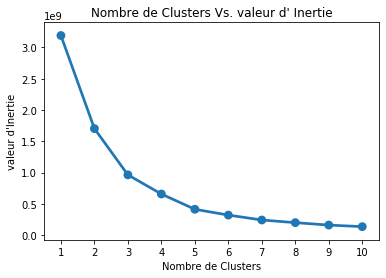

In [26]:
# Pour savoir le nombre de clusters k optimal(Method Elbow)
from sklearn.cluster import KMeans
clusters = [1,2,3,4,5,6,7,8,9,10]

inertia_values = []

for cluster in clusters:
    
    kmeans = KMeans(n_clusters = cluster)
    
    kmeans.fit(X)
    
    inertia_values.append(kmeans.inertia_)
    
import seaborn as sns

sns.pointplot(x = clusters, y = inertia_values)
plt.xlabel('Nombre de Clusters')
plt.ylabel("valeur d'Inertie")
plt.title("Nombre de Clusters Vs. valeur d' Inertie")
plt.show()

In [35]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [36]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [37]:
y_kmeans=kmeans.predict(X)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

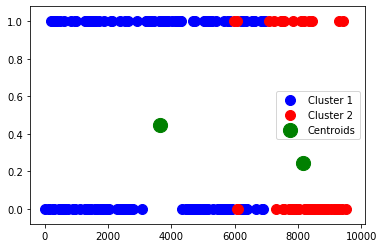

In [38]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'green', label = 'Centroids')
plt.legend()
plt.show()

In [17]:
# Encode categorical data and scale continuous data
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer

In [18]:
encoder=OneHotEncoder()

matrice_profil = encoder.fit_transform(data["profil"].values.reshape(-1,1)).toarray()

In [19]:
matrice_profil=np.delete(matrice_profil, [0,9], 1)

C:\Users\Wathek\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  """Entry point for launching an IPython kernel.


In [20]:
profil=pd.DataFrame(matrice_profil)

In [21]:
profil

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
3929,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3930,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3931,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3932,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [22]:
data=pd.concat([data,profil],axis=1)
data

,Unnamed: 0,location,connectionsCount,nobre de projets,Turnover,YoungGraduate,Gender,score,profil,BTP,...,Testing,Rédaction,0,1,2,3,4,5,6,7
0,0,1,1,1,0,0,1,12,Technical Lead/ Architecte JEE,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,0,1,0,0,0,1,51,JAVA/JEE,0.0,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,4,1,1,3,0,0,1,6,DRUPAL,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,0,1,0,0,0,1,270,PHP/Symfony,0.0,...,67,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,7,0,1,4,0,0,1,22,Web Front-End,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3929,9618,0,1,4,0,0,0,18,PHP/Symfony,0.0,...,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3930,9619,1,1,0,0,0,0,12,Web Back-End,0.0,...,0,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3931,9621,0,0,0,0,0,1,294,JAVA/JEE,0.0,...,9,75,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3932,9622,0,1,3,0,0,1,117,Technical Lead/ Architecte JEE,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [23]:
data=data.drop(columns=["Unnamed: 0","profil"])
data

,location,connectionsCount,nobre de projets,Turnover,YoungGraduate,Gender,score,BTP,BTS,Baccalauréat,...,Testing,Rédaction,0,1,2,3,4,5,6,7
0,1,1,1,0,0,1,12,0.0,0.0,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,1,0,0,0,1,51,0.0,0.0,0.0,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,1,3,0,0,1,6,0.0,0.0,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,0,0,0,1,270,0.0,0.0,0.0,...,67,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,1,4,0,0,1,22,0.0,0.0,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3929,0,1,4,0,0,0,18,0.0,0.0,1.0,...,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3930,1,1,0,0,0,0,12,0.0,0.0,1.0,...,0,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3931,0,0,0,0,0,1,294,0.0,0.0,0.0,...,9,75,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3932,0,1,3,0,0,1,117,0.0,0.0,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Clustering avec DBscan

In [46]:
import matplotlib.pyplot as plt 
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
sns.set()

In [47]:
X=data.values

In [48]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

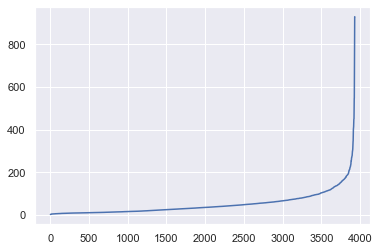

In [49]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [50]:
m = DBSCAN(eps=100, min_samples=5)
m.fit(X)

DBSCAN(algorithm='auto', eps=100, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [51]:
y_predict=m.fit_predict(X)

In [52]:
clusters = m.labels_

In [53]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

In [54]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
print(X_principal.head()) 

            P1          P2
0 -1572.616017 -111.255085
1 -1576.608533  -72.547454
2 -1588.618276 -117.411973
3 -1592.558707  150.872366
4 -1600.614204 -101.070686


In [77]:
# Numpy array of all the cluster labels assigned to each data point 
db_default = DBSCAN(eps = 180, min_samples = 100).fit(X_principal) 
labels = db_default.labels_ 

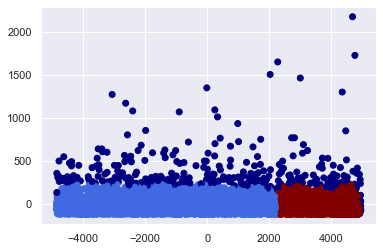

In [78]:
plt.scatter(X_principal['P1'], X_principal['P2'], c=vectorizer(labels))

### Similarité pour les 9 profils à la fois

In [24]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances

In [25]:
b = cosine_similarity(data)
np.fill_diagonal(b, 0 )
similarity_with_candidate = pd.DataFrame(b,index=data.index)
similarity_with_candidate.columns=data.index
similarity_with_candidate.head()

,0,1,2,3,4,5,6,7,8,9,...,3924,3925,3926,3927,3928,3929,3930,3931,3932,3933
0,0.000000,0.999978,0.999999,0.999076,0.999998,0.999577,0.999358,0.999961,0.999389,0.999747,...,0.999990,0.999998,0.999999,0.999896,0.999958,0.999999,0.999999,0.999531,0.999937,0.999995
1,0.999978,0.000000,0.999973,0.999296,0.999988,0.999745,0.999533,0.999989,0.999576,0.999848,...,0.999993,0.999986,0.999968,0.999956,0.999989,0.999979,0.999975,0.999683,0.999979,0.999991
2,0.999999,0.999973,0.000000,0.999036,0.999996,0.999551,0.999327,0.999953,0.999358,0.999726,...,0.999986,0.999997,1.000000,0.999884,0.999951,0.999999,1.000000,0.999502,0.999927,0.999991
3,0.999076,0.999296,0.999036,0.000000,0.999135,0.999765,0.999728,0.999356,0.999810,0.999705,...,0.999219,0.999127,0.999011,0.999551,0.999344,0.999076,0.999050,0.999781,0.999426,0.999191
4,0.999998,0.999988,0.999996,0.999135,0.000000,0.999623,0.999406,0.999973,0.999444,0.999777,...,0.999994,0.999999,0.999995,0.999915,0.999970,0.999998,0.999997,0.999574,0.999954,0.999998


In [26]:
def find_n_neighbours(df,n):
    order = np.argsort(df.values, axis=1)[:, :n]
    df = df.apply(lambda x: pd.Series(x.sort_values(ascending=False)
           .iloc[:n].index, 
          index=['top{}'.format(i) for i in range(1, n+1)]), axis=1)
    return df

In [27]:
# top 10 neighbours for each candidate
sim_candidate_10_m = find_n_neighbours(similarity_with_candidate,10)
sim_candidate_10_m

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
0,3630,42,471,2961,3272,3765,466,3725,1565,1708
1,1522,3617,3600,2086,615,2918,3200,2211,2580,2359
2,236,85,3154,3620,3741,39,3031,2026,3711,3654
3,1704,58,1408,1326,1822,2708,2425,1930,2957,3579
4,2946,3686,2967,2939,1878,3697,1362,3689,211,3132
...,...,...,...,...,...,...,...,...,...,...
3929,3113,3208,2894,2010,2942,3125,3556,3065,2802,2430
3930,3127,3730,297,468,3567,3110,146,3542,3206,1587
3931,401,3380,2844,2694,2366,3495,1851,3666,1189,1203
3932,3062,716,1811,3891,3182,2645,3284,202,1741,2527


### Similarité Pour le profil 'Full stack Back-End'

In [32]:
back_end;

In [106]:
back_end=back_end.drop(columns=['profil','Unnamed: 0'])

In [35]:
back_end

,location,connectionsCount,nobre de projets,Turnover,YoungGraduate,Gender,score,BTP,BTS,Baccalauréat,...,PHP,Symfony,Architecture RESTful,GIT,CMS,Drupal,Scrum,Analyse fonctionnelle,Testing,Rédaction
7,1,1,0,0,0,1,66,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,54,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
13,1,1,3,0,0,0,132,0.0,0.0,0.0,...,0,0,0,0,0,0,14,0,30,0
16,1,1,0,0,0,1,33,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,11
17,0,1,1,0,0,1,183,0.0,0.0,1.0,...,0,0,0,0,0,0,15,0,0,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3920,0,0,0,0,0,1,129,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3923,1,1,5,0,1,1,67,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3924,1,1,0,0,0,1,54,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3927,1,1,0,0,0,0,144,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,48,0


In [42]:
b_back_end = cosine_similarity(back_end)
np.fill_diagonal(b_back_end, 0 )
similarity_back_end = pd.DataFrame(b_back_end,index=back_end.index)
similarity_back_end.columns=back_end.index
similarity_back_end.head()

,7,10,13,16,17,18,23,27,32,35,...,3904,3906,3912,3918,3919,3920,3923,3924,3927,3930
7,0.000000,0.999987,0.999933,0.999980,0.999818,0.999948,0.999967,0.999978,0.999911,0.999948,...,0.999537,0.999168,0.999947,0.999645,0.999696,0.999976,0.999988,0.999984,0.999968,0.999956
10,0.999987,0.000000,0.999913,0.999987,0.999783,0.999964,0.999954,0.999969,0.999888,0.999964,...,0.999485,0.999098,0.999963,0.999598,0.999653,0.999967,0.999991,0.999989,0.999956,0.999970
13,0.999933,0.999913,0.000000,0.999875,0.999938,0.999799,0.999975,0.999957,0.999963,0.999799,...,0.999745,0.999469,0.999796,0.999825,0.999857,0.999959,0.999905,0.999886,0.999987,0.999814
16,0.999980,0.999987,0.999875,0.000000,0.999733,0.999989,0.999931,0.999951,0.999847,0.999988,...,0.999413,0.999001,0.999988,0.999533,0.999576,0.999948,0.999994,0.999996,0.999932,0.999992
17,0.999818,0.999783,0.999938,0.999733,0.000000,0.999612,0.999901,0.999869,0.999929,0.999611,...,0.999914,0.999730,0.999608,0.999966,0.999906,0.999872,0.999768,0.999739,0.999888,0.999636


In [43]:
# top 10 neighbours for each candidate
sim_back_end_10 = find_n_neighbours(similarity_back_end,10)
sim_back_end_10

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
7,1487,2722,181,3284,3891,1811,2847,3062,2645,716
10,2042,3923,3372,1933,3510,315,3003,3100,464,656
13,3102,397,164,823,1973,2792,1481,1858,179,3303
16,3439,252,141,3204,295,819,861,238,3053,205
17,867,1029,2864,2758,1825,3618,144,316,1971,2284
...,...,...,...,...,...,...,...,...,...,...
3920,27,1155,1754,623,3245,1925,2117,2383,3580,2050
3923,315,618,3271,464,3728,719,3002,283,3156,304
3924,3488,3164,3892,3097,871,3462,190,205,3053,238
3927,3663,2057,2474,2459,2804,3244,3611,3811,3853,351


### Similarité Pour le profil 'Full stack Front-End'

In [90]:
front_end

,Unnamed: 0,location,connectionsCount,nobre de projets,Turnover,YoungGraduate,Gender,score,profil,BTP,...,PHP,Symfony,Architecture RESTful,GIT,CMS,Drupal,Scrum,Analyse fonctionnelle,Testing,Rédaction
4,7,0,1,4,0,0,1,22,Web Front-End,0.0,...,0,0,0,0,0,0,0,0,0,0
14,32,1,1,0,0,1,1,96,Web Front-End,0.0,...,0,0,0,0,0,0,0,0,0,0
40,97,0,1,1,0,0,1,108,Web Front-End,0.0,...,0,0,0,0,0,0,0,0,0,0
41,99,1,1,3,1,1,1,8,Web Front-End,0.0,...,0,0,0,2,0,0,0,0,0,0
42,100,0,1,0,0,0,1,15,Web Front-End,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3916,9580,0,1,0,1,0,1,117,Web Front-End,0.0,...,0,0,0,0,0,0,0,0,0,0
3917,9581,1,1,0,0,0,1,40,Web Front-End,0.0,...,0,0,0,0,0,0,0,0,0,0
3922,9605,1,0,1,0,0,1,231,Web Front-End,0.0,...,0,0,0,0,0,0,0,0,0,0
3925,9611,1,1,3,1,0,1,30,Web Front-End,0.0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
front_end=front_end.drop(columns=['profil','Unnamed: 0'])

In [92]:
b = cosine_similarity(front_end)
np.fill_diagonal(b, 0 )
similarity_front_end = pd.DataFrame(b,index=front_end.index)
similarity_front_end.columns=front_end.index
similarity_front_end.head()

,4,14,40,41,42,56,71,87,92,97,...,3878,3881,3899,3910,3914,3916,3917,3922,3925,3933
4,0.000000,0.999929,0.999928,0.999997,0.999999,0.999867,0.999683,0.998895,0.999424,0.999998,...,0.999997,0.999999,0.999951,0.999642,0.999869,0.999949,0.999999,0.999738,0.999999,0.999998
14,0.999929,0.000000,0.999975,0.999898,0.999910,0.999959,0.999867,0.999310,0.999720,0.999908,...,0.999944,0.999934,0.999976,0.999843,0.999959,0.999976,0.999942,0.999898,0.999925,0.999939
40,0.999928,0.999975,0.000000,0.999898,0.999914,0.999990,0.999912,0.999289,0.999712,0.999912,...,0.999940,0.999933,0.999998,0.999890,0.999961,0.999998,0.999937,0.999940,0.999925,0.999948
41,0.999997,0.999898,0.999898,0.000000,0.999999,0.999826,0.999621,0.998791,0.999344,0.999999,...,0.999990,0.999995,0.999925,0.999577,0.999832,0.999924,0.999993,0.999682,0.999997,0.999992
42,0.999999,0.999910,0.999914,0.999999,0.000000,0.999848,0.999654,0.998836,0.999379,1.000000,...,0.999993,0.999997,0.999940,0.999611,0.999850,0.999938,0.999996,0.999712,0.999998,0.999996


In [93]:
# top 10 neighbours for each candidate
sim_front_end_10 = find_n_neighbours(similarity_front_end,10)
sim_front_end_10

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
4,2967,1362,3689,487,3090,3790,2029,648,231,416
14,3396,3719,2903,358,3784,1897,3444,2109,3623,3034
40,3692,1493,913,1257,1898,1254,3916,3899,675,636
41,1874,2008,3739,1951,3224,330,1879,2020,3868,1736
42,3630,3272,3765,2996,3767,3568,1708,835,1565,796
...,...,...,...,...,...,...,...,...,...,...
3916,3899,1254,1898,1257,3147,439,364,1493,40,3692
3917,1362,3689,2920,3706,2029,3790,4,1382,2967,487
3922,2671,3266,989,1160,71,1517,2736,3549,2424,3910
3925,3881,2967,4,3090,487,212,386,1539,1752,3489


### Similarité Pour le profil 'JAVA/JEE'

In [94]:
java_jee=java_jee.drop(columns=['profil','Unnamed: 0'])

In [95]:
b = cosine_similarity(java_jee)
np.fill_diagonal(b, 0 )
similarity_java_jee = pd.DataFrame(b,index=java_jee.index)
similarity_java_jee.columns=java_jee.index
similarity_java_jee.head()

,1,5,21,24,45,48,52,70,88,110,...,3879,3886,3890,3903,3905,3909,3915,3921,3926,3931
1,0.000000,0.999745,0.999989,0.999989,0.999852,0.999959,0.999009,0.999985,0.999963,0.999969,...,0.999977,0.999983,0.999995,0.999968,0.999960,0.999039,0.999674,0.999981,0.999968,0.999683
5,0.999745,0.000000,0.999720,0.999649,0.999904,0.999817,0.999605,0.999610,0.999797,0.999538,...,0.999572,0.999598,0.999672,0.999534,0.999842,0.999634,0.999899,0.999588,0.999534,0.999909
21,0.999989,0.999720,0.000000,0.999988,0.999851,0.999972,0.999013,0.999979,0.999971,0.999963,...,0.999973,0.999978,0.999986,0.999962,0.999972,0.999086,0.999676,0.999975,0.999962,0.999689
24,0.999989,0.999649,0.999988,0.000000,0.999807,0.999944,0.998904,0.999997,0.999953,0.999989,...,0.999993,0.999995,0.999996,0.999988,0.999938,0.998912,0.999599,0.999995,0.999988,0.999614
45,0.999852,0.999904,0.999851,0.999807,0.000000,0.999911,0.999545,0.999776,0.999922,0.999717,...,0.999743,0.999763,0.999806,0.999714,0.999929,0.999514,0.999914,0.999758,0.999714,0.999907


In [96]:
# top 10 neighbours for each candidate
sim_java_jee_10 = find_n_neighbours(similarity_java_jee,10)
sim_java_jee_10

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
1,1522,3617,3600,2086,615,2918,3200,2211,2580,2523
5,3516,2579,2705,1627,3027,1185,1641,176,3867,2567
21,311,3046,3162,3628,3078,3799,3160,470,3070,2663
24,1720,2877,1428,1784,2358,2763,3082,1022,243,801
45,1549,3029,809,3436,1726,609,851,3242,1152,1397
...,...,...,...,...,...,...,...,...,...,...
3909,2025,2632,1949,3416,1724,790,2504,1880,2160,3763
3915,3436,1929,176,1732,540,2803,160,1509,3130,3588
3921,227,1249,3474,1507,1803,3218,2045,3641,2028,395
3926,3842,267,3903,2962,2984,110,3731,432,3538,441


### Similarité Pour le profil 'PHP/Symfony'

In [97]:
php_symfony=php_symfony.drop(columns=['profil','Unnamed: 0'])

In [98]:
b = cosine_similarity(php_symfony)
np.fill_diagonal(b, 0 )
similarity_php_symfony = pd.DataFrame(b,index=php_symfony.index)
similarity_php_symfony.columns=php_symfony.index
similarity_php_symfony.head()

,3,19,20,22,55,75,93,107,112,116,...,3556,3572,3642,3649,3687,3698,3699,3786,3826,3929
3,0.000000,0.999084,0.999782,0.999402,0.999467,0.999701,0.999602,0.999668,0.999124,0.999561,...,0.999096,0.999172,0.999032,0.999590,0.999079,0.990577,0.999271,0.999394,0.999333,0.999076
19,0.999084,0.000000,0.998913,0.999947,0.999911,0.999051,0.999825,0.998826,0.999998,0.999890,...,0.999999,0.999995,0.999999,0.999845,0.999999,0.984558,0.999984,0.999955,0.999966,0.999999
20,0.999782,0.998913,0.000000,0.999273,0.999324,0.999776,0.999498,0.999759,0.998972,0.999389,...,0.998928,0.999001,0.998857,0.999443,0.998913,0.990948,0.999123,0.999264,0.999201,0.998905
22,0.999402,0.999947,0.999273,0.000000,0.999968,0.999405,0.999964,0.999258,0.999955,0.999966,...,0.999950,0.999963,0.999935,0.999965,0.999946,0.986100,0.999989,0.999989,0.999980,0.999945
55,0.999467,0.999911,0.999324,0.999968,0.000000,0.999421,0.999938,0.999253,0.999921,0.999956,...,0.999922,0.999932,0.999899,0.999937,0.999910,0.986401,0.999955,0.999983,0.999958,0.999915


In [99]:
# top 10 neighbours for each candidate
sim_php_symfony_10 = find_n_neighbours(similarity_php_symfony,10)
sim_php_symfony_10

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
3,1236,473,3281,278,3348,2426,1320,1289,2750,20
19,336,2894,3125,3113,3687,2010,2009,3929,1568,2959
20,1289,261,2816,473,278,3,339,75,2170,3281
22,704,3699,3786,2970,3435,1259,1573,792,1497,3308
55,1342,2975,2726,1714,2954,709,485,3786,659,2970
...,...,...,...,...,...,...,...,...,...,...
3698,1914,1432,1392,2556,2855,2509,2619,2220,3318,937
3699,1964,1573,3255,519,2418,742,280,3476,3150,1367
3786,2970,1834,1766,3314,1573,1259,2726,792,22,519
3826,3426,1259,1573,3048,3476,2232,1766,3150,792,1367


### Similarité Pour le profil 'Drupal'

In [100]:
drupal

,Unnamed: 0,location,connectionsCount,nobre de projets,Turnover,YoungGraduate,Gender,score,profil,BTP,...,PHP,Symfony,Architecture RESTful,GIT,CMS,Drupal,Scrum,Analyse fonctionnelle,Testing,Rédaction
2,4,1,1,3,0,0,1,6,DRUPAL,0.0,...,2,0,0,0,0,0,0,0,0,0
6,11,0,1,0,0,0,1,227,DRUPAL,0.0,...,0,0,0,60,0,0,0,0,0,0
34,82,0,0,0,0,0,1,117,DRUPAL,0.0,...,0,39,0,0,0,0,0,0,0,0
36,85,1,1,0,0,0,1,22,DRUPAL,0.0,...,0,0,0,0,0,0,0,0,0,0
37,86,1,0,0,0,0,1,3,DRUPAL,0.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3852,9426,1,1,0,0,0,1,9,DRUPAL,0.0,...,0,3,0,0,0,0,0,0,0,0
3877,9486,1,1,0,0,0,0,8,DRUPAL,0.0,...,0,0,0,0,0,0,0,0,0,0
3883,9504,1,1,0,0,0,1,2,DRUPAL,0.0,...,0,0,0,0,0,0,0,0,0,0
3898,9540,1,1,3,0,0,1,33,DRUPAL,0.0,...,0,11,0,0,0,0,0,0,0,0


In [101]:
drupal=drupal.drop(columns=['profil','Unnamed: 0'])

In [102]:
b = cosine_similarity(drupal)
np.fill_diagonal(b, 0 )
similarity_drupal = pd.DataFrame(b,index=drupal.index)
similarity_drupal.columns=drupal.index
similarity_drupal.head()

,2,6,34,36,37,39,44,50,51,67,...,3818,3823,3825,3839,3848,3852,3877,3883,3898,3908
2,0.000000,0.999327,0.999856,0.999996,1.000000,1.000000,0.999981,0.999357,0.999554,0.999994,...,0.999982,0.999987,1.000000,0.999981,0.999994,1.000000,1.000000,1.000000,0.999996,0.999970
6,0.999327,0.000000,0.999693,0.999395,0.999311,0.999337,0.999493,0.999853,0.999880,0.999420,...,0.999486,0.999471,0.999312,0.999500,0.999428,0.999331,0.999327,0.999304,0.999414,0.999532
34,0.999856,0.999693,0.000000,0.999893,0.999849,0.999861,0.999933,0.999765,0.999863,0.999905,...,0.999917,0.999924,0.999849,0.999925,0.999902,0.999860,0.999856,0.999846,0.999899,0.999940
36,0.999996,0.999395,0.999893,0.000000,0.999995,0.999997,0.999990,0.999424,0.999609,1.000000,...,0.999989,0.999994,0.999996,0.999990,0.999997,0.999997,0.999996,0.999995,0.999998,0.999983
37,1.000000,0.999311,0.999849,0.999995,0.000000,1.000000,0.999978,0.999338,0.999540,0.999992,...,0.999979,0.999985,1.000000,0.999978,0.999993,1.000000,1.000000,1.000000,0.999994,0.999966


In [103]:
# top 10 neighbours for each candidate
sim_drupal_10 = find_n_neighbours(similarity_drupal,10)
sim_drupal_10

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
2,236,85,39,2026,3711,3412,135,1872,3114,136
6,2824,1133,51,1945,1200,3486,2490,50,1351,743
34,815,2866,189,3614,68,2105,3415,3061,493,975
36,788,391,1854,67,102,2353,2463,2049,2932,96
37,417,3791,758,3541,3883,3170,3825,2013,277,1872
...,...,...,...,...,...,...,...,...,...,...
3852,136,3412,3732,1134,668,1946,1807,39,3028,3877
3877,3028,1595,3428,301,3504,3825,3170,136,3852,3412
3883,3170,758,417,250,3791,37,3825,3541,3159,277
3898,77,1095,3297,429,2932,106,2993,3848,875,2214


### Similarité Pour le profil 'Product Owner'

In [39]:
product_owner=product_owner.drop(columns=['profil','Unnamed: 0'])

In [106]:
b = cosine_similarity(product_owner)
np.fill_diagonal(b, 0 )
similarity_product_owner = pd.DataFrame(b,index=product_owner.index)
similarity_product_owner.columns=product_owner.index
similarity_product_owner.head()

,9,62,66,91,114,119,124,137,171,188,...,3693,3724,3748,3754,3758,3792,3800,3838,3855,3885
9,0.000000,0.999811,0.999714,0.999462,0.999353,0.999260,0.999062,0.999119,0.998774,0.998243,...,0.685560,0.667881,0.685965,0.666397,0.665891,0.670734,0.675667,0.680356,0.684962,0.689338
62,0.999811,0.000000,0.999863,0.999727,0.999832,0.999767,0.999494,0.999595,0.999457,0.999081,...,0.697929,0.680461,0.698255,0.679078,0.678487,0.683285,0.688140,0.692727,0.697264,0.701605
66,0.999714,0.999863,0.000000,0.999488,0.999757,0.999608,0.999791,0.999773,0.999528,0.999113,...,0.699046,0.682058,0.699805,0.680159,0.680113,0.684738,0.689576,0.694348,0.698829,0.703062
91,0.999462,0.999727,0.999488,0.000000,0.999724,0.999769,0.999212,0.999464,0.999366,0.999156,...,0.703474,0.685687,0.703388,0.684749,0.683744,0.688645,0.693477,0.697843,0.702384,0.706708
114,0.999353,0.999832,0.999757,0.999724,0.000000,0.999965,0.999734,0.999843,0.999851,0.999651,...,0.710560,0.693392,0.710886,0.692017,0.691459,0.696177,0.700947,0.705456,0.709907,0.714162


In [107]:
# top 10 neighbours for each candidate
sim_product_owner_10 = find_n_neighbours(similarity_product_owner,10)
sim_product_owner_10

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
9,62,66,91,114,119,137,124,171,188,198
62,66,114,9,119,91,137,124,171,188,198
66,62,124,137,114,9,119,171,91,188,219
91,119,62,114,66,137,9,171,124,188,199
114,119,171,137,62,66,124,91,188,198,219
...,...,...,...,...,...,...,...,...,...,...
3792,3800,3724,3758,1861,1118,3659,3838,3855,3748,3754
3800,1118,3792,3838,3724,3855,3748,3758,1861,3885,3659
3838,3855,3748,3885,3800,1118,3724,3792,3758,1861,1312
3855,3748,3838,3885,1118,1312,3800,3792,3724,3758,1861


### Similarité Pour le profil 'Embarque_Middleware'

In [108]:
embarque_middleware=embarque_middleware.drop(columns=['profil','Unnamed: 0'])

In [109]:
b = cosine_similarity(embarque_middleware)
np.fill_diagonal(b, 0 )
similarity_embarque_middleware = pd.DataFrame(b,index=embarque_middleware.index)
similarity_embarque_middleware.columns=embarque_middleware.index
similarity_embarque_middleware.head()

,26,30,31,59,81,83,168,185,203,222,...,3662,3670,3747,3751,3756,3795,3837,3854,3861,3894
26,0.000000,0.999737,0.999887,0.999971,0.999888,0.999941,0.999976,0.999966,0.999905,0.997131,...,0.999977,0.999961,0.999915,0.999899,0.999973,0.999959,0.999974,0.999930,0.999924,0.999962
30,0.999737,0.000000,0.999387,0.999649,0.999786,0.999807,0.999687,0.999591,0.999434,0.998410,...,0.999728,0.999797,0.999463,0.999913,0.999693,0.999595,0.999665,0.999506,0.999479,0.999604
31,0.999887,0.999387,0.000000,0.999945,0.999688,0.999766,0.999927,0.999972,0.999999,0.996025,...,0.999893,0.999814,0.999996,0.999670,0.999928,0.999972,0.999940,0.999992,0.999995,0.999964
59,0.999971,0.999649,0.999945,0.000000,0.999863,0.999938,0.999984,0.999988,0.999957,0.996806,...,0.999974,0.999937,0.999963,0.999850,0.999981,0.999989,0.999998,0.999977,0.999972,0.999998
81,0.999888,0.999786,0.999688,0.999863,0.000000,0.999932,0.999868,0.999807,0.999717,0.997585,...,0.999888,0.999901,0.999735,0.999884,0.999859,0.999825,0.999854,0.999760,0.999748,0.999841


In [110]:
# top 10 neighbours for each candidate
sim_embarque_middleware_10 = find_n_neighbours(similarity_embarque_middleware,10)
sim_embarque_middleware_10

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
26,2391,291,491,444,2929,2433,3662,168,350,3650
30,3191,3751,2661,3566,1461,229,1663,3579,1650,3148
31,3165,1217,3016,456,203,299,3596,1735,3747,3861
59,3837,2301,3894,3650,1246,2433,3795,1488,3398,185
81,3564,83,2929,350,3670,407,3609,502,444,2628
...,...,...,...,...,...,...,...,...,...,...
3795,2071,793,868,185,3894,1460,3398,1246,770,2593
3837,59,3650,1246,3894,2301,3795,185,3398,1488,3607
3854,3861,2071,3747,868,1926,1735,299,3596,203,3016
3861,3854,3747,1735,3596,299,203,3016,456,1926,1217


### Similarité Pour le profil 'Tech Lead/Architecte JEE'

In [111]:
tech_lead=tech_lead.drop(columns=['profil','Unnamed: 0'])

In [112]:
b = cosine_similarity(tech_lead)
np.fill_diagonal(b, 0 )
similarity_tech_lead = pd.DataFrame(b,index=tech_lead.index)
similarity_tech_lead.columns=tech_lead.index
similarity_tech_lead.head()

,0,8,11,12,15,25,28,29,33,49,...,3873,3876,3882,3889,3893,3895,3896,3900,3913,3932
0,0.000000,0.999389,1.000000,0.999829,0.999564,0.999999,0.998614,0.999909,0.999988,0.999882,...,0.999924,0.999927,0.999879,0.999891,0.999882,0.999973,0.999891,0.999890,0.999915,0.999937
8,0.999389,0.000000,0.999389,0.999799,0.999972,0.999397,0.999770,0.999760,0.999521,0.999792,...,0.999716,0.999692,0.999761,0.999736,0.999787,0.999599,0.999735,0.999772,0.999756,0.999709
11,1.000000,0.999389,0.000000,0.999828,0.999563,0.999999,0.998610,0.999908,0.999988,0.999881,...,0.999923,0.999927,0.999878,0.999890,0.999881,0.999973,0.999890,0.999889,0.999915,0.999937
12,0.999829,0.999799,0.999828,0.000000,0.999882,0.999829,0.999352,0.999953,0.999898,0.999962,...,0.999954,0.999937,0.999974,0.999944,0.999958,0.999916,0.999944,0.999960,0.999959,0.999944
15,0.999564,0.999972,0.999563,0.999882,0.000000,0.999570,0.999684,0.999855,0.999678,0.999888,...,0.999837,0.999808,0.999869,0.999849,0.999883,0.999735,0.999849,0.999874,0.999861,0.999817


In [113]:
# top 10 neighbours for each candidate
sim_tech_lead_10 = find_n_neighbours(similarity_tech_lead,10)
sim_tech_lead_10

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
0,3725,371,3821,2891,161,11,3375,3392,3871,2916
8,234,233,3529,403,2503,15,2936,1181,2088,993
11,0,2942,3392,3725,3821,2879,2891,371,161,3871
12,3789,3173,2139,3882,1758,3124,329,177,3644,1869
15,403,233,3529,234,2299,3151,816,2088,272,1327
...,...,...,...,...,...,...,...,...,...,...
3895,173,1551,3084,3011,363,1806,3371,530,1469,1745
3896,1727,1975,2444,320,1579,3336,1676,49,3846,82
3900,3643,82,3336,1579,320,49,3736,3913,1942,1676
3913,3494,1942,3336,220,3680,82,3736,3013,3236,2038


### Similarité Pour le profil 'FullStack JS'

In [114]:
full_stack_js=full_stack_js.drop(columns=['profil','Unnamed: 0'])

In [115]:
b = cosine_similarity(full_stack_js)
np.fill_diagonal(b, 0 )
similarity_full_stack_js = pd.DataFrame(b,index=full_stack_js.index)
similarity_full_stack_js.columns=full_stack_js.index
similarity_full_stack_js.head()

,78,80,94,111,117,126,150,162,174,193,...,3802,3817,3835,3840,3845,3858,3880,3907,3911,3928
78,0.000000,0.998948,0.999825,0.999733,0.999964,0.999918,0.999781,0.999787,0.999999,0.999786,...,0.999972,0.999931,0.999973,0.998730,0.999995,0.999926,0.999907,0.999999,0.999901,0.999960
80,0.998948,0.000000,0.999494,0.999617,0.999223,0.999384,0.999559,0.999581,0.998964,0.999561,...,0.999214,0.999368,0.999187,0.999767,0.999040,0.999372,0.999397,0.998895,0.999413,0.999237
94,0.999825,0.999494,0.000000,0.999943,0.999902,0.999932,0.999906,0.999914,0.999830,0.999910,...,0.999896,0.999931,0.999894,0.999294,0.999850,0.999930,0.999928,0.999805,0.999930,0.999914
111,0.999733,0.999617,0.999943,0.000000,0.999853,0.999908,0.999929,0.999938,0.999740,0.999938,...,0.999846,0.999906,0.999844,0.999487,0.999770,0.999907,0.999911,0.999706,0.999916,0.999847
117,0.999964,0.999223,0.999902,0.999853,0.000000,0.999968,0.999883,0.999907,0.999968,0.999902,...,0.999982,0.999979,0.999988,0.999068,0.999974,0.999973,0.999969,0.999956,0.999964,0.999976


In [116]:
# top 10 neighbours for each candidate
sim_full_stack_js_10 = find_n_neighbours(similarity_full_stack_js,10)
sim_full_stack_js_10

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
78,3035,387,3333,542,1944,1703,1681,174,1693,2460
80,218,727,1316,2081,3773,1380,3581,1577,3668,822
94,3005,669,2471,111,3103,1543,126,264,3817,3615
111,2738,3096,3005,431,3582,94,2713,2865,1543,375
117,2581,3410,376,2820,3497,3133,3109,3835,3105,1330
...,...,...,...,...,...,...,...,...,...,...
3858,3653,357,425,2136,1498,3615,2733,1909,3109,2285
3880,126,306,3615,3817,3858,425,2471,3133,3911,2285
3907,424,3030,328,854,3026,1947,836,865,463,862
3911,3615,264,425,3858,306,3817,2471,126,3880,2527


### Clustering avec Kmeans

In [117]:
X1=data.values

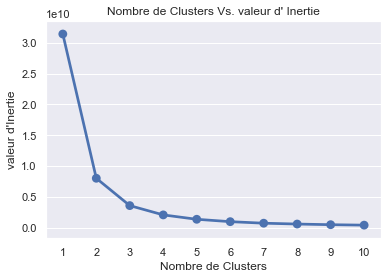

In [118]:
# Pour savoir le nombre de clusters k optimal(Method Elbow)
from sklearn.cluster import KMeans
clusters = [1,2,3,4,5,6,7,8,9,10]

inertia_values = []

for cluster in clusters:
    
    kmeans = KMeans(n_clusters = cluster)
    
    kmeans.fit(X1)
    
    inertia_values.append(kmeans.inertia_)
    
import seaborn as sns

sns.pointplot(x = clusters, y = inertia_values)
plt.xlabel('Nombre de Clusters')
plt.ylabel("valeur d'Inertie")
plt.title("Nombre de Clusters Vs. valeur d' Inertie")
plt.show()

In [125]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [126]:
y_kmeans=kmeans.predict(X1)
y_kmeans.tolist()

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


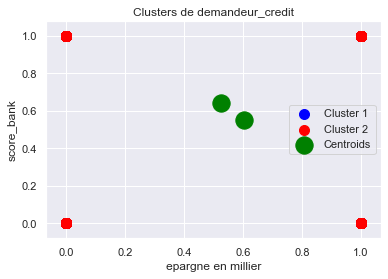

In [127]:
plt.scatter(X1[y_kmeans == 0, 0], X1[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X1[y_kmeans == 1, 0], X1[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'green', label = 'Centroids')
plt.title('Clusters de demandeur_credit')
plt.xlabel('epargne en millier')
plt.ylabel('score_bank')
plt.legend()
plt.show()

###  SVD

In [128]:
from scipy.sparse.linalg import svds
A = similarity_with_candidate.values
u, s, vt = svds(A, k=2) # k is the number of factors
s

array([  54.02203981, 3871.24877747])

In [129]:
from scipy.sparse.linalg import svds
A = data.values
u, s, vt = svds(A, k=2) # k is the number of factors
s

array([ 10516.51267167, 357491.17828776])

In [69]:
sim_back_end_10.iloc[0].values

array([ 813,  866,  369, 1580, 2120, 2117, 1399, 1982,  925, 2707],
      dtype=int64)

In [13]:
data.corr(method='pearson',min_periods=1)

,Unnamed: 0,connectionsCount,location,nobre de projets,Turnover,JavaScript,SQL,NoSQL,Node.js,Express.js,...,Master,Docteur,BTS,BTP,Vide_degree,Baccalauréat,Other,YoungGraduate,Gender,score
Unnamed: 0,1.000000,0.067778,-0.069962,0.087079,0.134336,-0.000126,0.012719,-0.011739,0.045691,-0.019054,...,-0.023560,-0.023917,0.144876,0.000363,0.041181,-0.066434,-0.149864,0.036694,0.013684,-0.006615
connectionsCount,0.067778,1.000000,-0.221479,0.184766,0.054510,-0.019266,0.008211,0.023455,-0.006952,-0.011243,...,-0.008288,-0.025694,0.198898,-0.031291,-0.008840,-0.226196,-0.006961,0.030828,0.047104,-0.031199
location,-0.069962,-0.221479,1.000000,-0.077443,-0.034957,-0.031485,-0.023644,-0.020712,-0.032450,0.003112,...,-0.021984,-0.065136,-0.058649,0.032575,-0.145698,0.161884,0.049298,0.094278,-0.068121,-0.063253
nobre de projets,0.087079,0.184766,-0.077443,1.000000,0.045203,-0.029159,-0.059946,-0.014231,-0.010283,0.003946,...,0.019855,-0.024632,0.184509,-0.006125,-0.008123,-0.087726,-0.137485,0.087237,0.039968,-0.057528
Turnover,0.134336,0.054510,-0.034957,0.045203,1.000000,-0.029789,-0.012238,-0.013485,0.014523,-0.007923,...,-0.007549,0.037710,0.061204,-0.028044,0.021013,-0.043790,-0.052568,0.068155,-0.044524,-0.053117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Baccalauréat,-0.066434,-0.226196,0.161884,-0.087726,-0.043790,0.011967,0.026062,0.046565,0.007760,-0.017056,...,-0.016252,-0.050383,-0.404187,-0.108382,-0.167274,1.000000,-0.208995,-0.049770,-0.017016,0.060747
Other,-0.149864,-0.006961,0.049298,-0.137485,-0.052568,-0.005030,-0.011741,-0.014710,0.010803,0.005522,...,-0.017449,-0.054094,-0.433957,-0.116364,-0.179594,-0.208995,1.000000,-0.052668,0.006499,-0.030023
YoungGraduate,0.036694,0.030828,0.094278,0.087237,0.068155,-0.038477,-0.082955,-0.013672,-0.023588,0.038113,...,0.019358,-0.006442,0.067846,-0.025115,0.033233,-0.049770,-0.052668,1.000000,-0.047338,-0.156251
Gender,0.013684,0.047104,-0.068121,0.039968,-0.044524,0.044342,0.019078,0.013694,0.031734,0.017481,...,-0.053677,-0.054097,-0.012824,0.045286,0.022373,-0.017016,0.006499,-0.047338,1.000000,0.117008


In [30]:
b = data.corrwith(method="pearson",min_periods=1)
np.fill_diagonal(b, 0 )
similarity_with_candidate = pd.DataFrame(b,index=data.index)
similarity_with_candidate.columns=data.index
similarity_with_candidate.head()

TypeError: corrwith() got an unexpected keyword argument 'min_periods'

In [24]:
data.corr()

,Unnamed: 0,connectionsCount,location,nobre de projets,Turnover,JavaScript,SQL,NoSQL,Node.js,Express.js,...,Master,Docteur,BTS,BTP,Vide_degree,Baccalauréat,Other,YoungGraduate,Gender,score
Unnamed: 0,1.000000,0.067778,-0.069962,0.087079,0.134336,-0.000126,0.012719,-0.011739,0.045691,-0.019054,...,-0.023560,-0.023917,0.144876,0.000363,0.041181,-0.066434,-0.149864,0.036694,0.013684,-0.006615
connectionsCount,0.067778,1.000000,-0.221479,0.184766,0.054510,-0.019266,0.008211,0.023455,-0.006952,-0.011243,...,-0.008288,-0.025694,0.198898,-0.031291,-0.008840,-0.226196,-0.006961,0.030828,0.047104,-0.031199
location,-0.069962,-0.221479,1.000000,-0.077443,-0.034957,-0.031485,-0.023644,-0.020712,-0.032450,0.003112,...,-0.021984,-0.065136,-0.058649,0.032575,-0.145698,0.161884,0.049298,0.094278,-0.068121,-0.063253
nobre de projets,0.087079,0.184766,-0.077443,1.000000,0.045203,-0.029159,-0.059946,-0.014231,-0.010283,0.003946,...,0.019855,-0.024632,0.184509,-0.006125,-0.008123,-0.087726,-0.137485,0.087237,0.039968,-0.057528
Turnover,0.134336,0.054510,-0.034957,0.045203,1.000000,-0.029789,-0.012238,-0.013485,0.014523,-0.007923,...,-0.007549,0.037710,0.061204,-0.028044,0.021013,-0.043790,-0.052568,0.068155,-0.044524,-0.053117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Baccalauréat,-0.066434,-0.226196,0.161884,-0.087726,-0.043790,0.011967,0.026062,0.046565,0.007760,-0.017056,...,-0.016252,-0.050383,-0.404187,-0.108382,-0.167274,1.000000,-0.208995,-0.049770,-0.017016,0.060747
Other,-0.149864,-0.006961,0.049298,-0.137485,-0.052568,-0.005030,-0.011741,-0.014710,0.010803,0.005522,...,-0.017449,-0.054094,-0.433957,-0.116364,-0.179594,-0.208995,1.000000,-0.052668,0.006499,-0.030023
YoungGraduate,0.036694,0.030828,0.094278,0.087237,0.068155,-0.038477,-0.082955,-0.013672,-0.023588,0.038113,...,0.019358,-0.006442,0.067846,-0.025115,0.033233,-0.049770,-0.052668,1.000000,-0.047338,-0.156251
Gender,0.013684,0.047104,-0.068121,0.039968,-0.044524,0.044342,0.019078,0.013694,0.031734,0.017481,...,-0.053677,-0.054097,-0.012824,0.045286,0.022373,-0.017016,0.006499,-0.047338,1.000000,0.117008


In [25]:
from surprise.similarities import pearson

In [41]:
pearson(data.iloc[1,:].values,data.iloc[0,:].values,5)

TypeError: only integer scalar arrays can be converted to a scalar index

## Evaluation du modéle 

In [48]:
from recmetrics import intra_list_similarity, personalization

#### Intra_list_similarity

In [201]:
A=sim_candidate_10_m.values

In [202]:
data_test=pd.DataFrame(data=data,index=sim_candidate_10_m.index)
data_test

,location,connectionsCount,nobre de projets,Turnover,YoungGraduate,Gender,score,BTP,BTS,Baccalauréat,...,Testing,Rédaction,0,1,2,3,4,5,6,7
0,1,1,1,0,0,1,12,0.0,0.0,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,1,0,0,0,1,51,0.0,0.0,0.0,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,1,3,0,0,1,6,0.0,0.0,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,0,0,0,1,270,0.0,0.0,0.0,...,67,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,1,4,0,0,1,22,0.0,0.0,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3929,0,1,4,0,0,0,18,0.0,0.0,1.0,...,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3930,1,1,0,0,0,0,12,0.0,0.0,1.0,...,0,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3931,0,0,0,0,0,1,294,0.0,0.0,0.0,...,9,75,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3932,0,1,3,0,0,1,117,0.0,0.0,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [203]:
intra_list_similarity(A,data_test)

0.9988855810796349

#### Personalization

In [29]:
ss=0
d=0
for i in range (0,len(b)-1):
    for j in range(i+1,len(b)):
        ss=ss+b[i][j]
        d+=1
personalization =(ss/d)
personalization

0.9799105843810162

### Evaluation du profil Back_end (profil wevioo)

#### Personalization

In [40]:
ss=0
d=0
for i in range (0,len(b_back_end)-1):
    for j in range(i+1,len(b_back_end)):
        ss=ss+b_back_end[i][j]
        d+=1
personalization = (ss/d)
personalization

0.9876700923734568

On remarque une augmentation du score d'évaluation pour la méthode personnalisation qui est plus ou moin prévisible dans l'exemple du cluster back_end (exemple profil wevioo) dans le sens ou notre recommandation est encore plus personnalisée et spécifiée pour un certain profil demandé

In [45]:
A_back_end=sim_back_end_10.values

In [46]:
back_end_test=pd.DataFrame(data=data,index=sim_back_end_10.index)
back_end_test

,location,connectionsCount,nobre de projets,Turnover,YoungGraduate,Gender,score,BTP,BTS,Baccalauréat,...,Testing,Rédaction,0,1,2,3,4,5,6,7
7,1,1,0,0,0,1,66,0.0,0.0,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10,0,0,0,0,0,0,54,0.0,0.0,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13,1,1,3,0,0,0,132,0.0,0.0,0.0,...,30,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16,1,1,0,0,0,1,33,0.0,0.0,1.0,...,0,11,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17,0,1,1,0,0,1,183,0.0,0.0,1.0,...,0,46,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3920,0,0,0,0,0,1,129,0.0,0.0,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3923,1,1,5,0,1,1,67,0.0,0.0,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3924,1,1,0,0,0,1,54,0.0,0.0,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3927,1,1,0,0,0,0,144,0.0,0.0,0.0,...,48,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [50]:
intra_list_similarity(A_back_end,back_end_test)

0.999219691096203